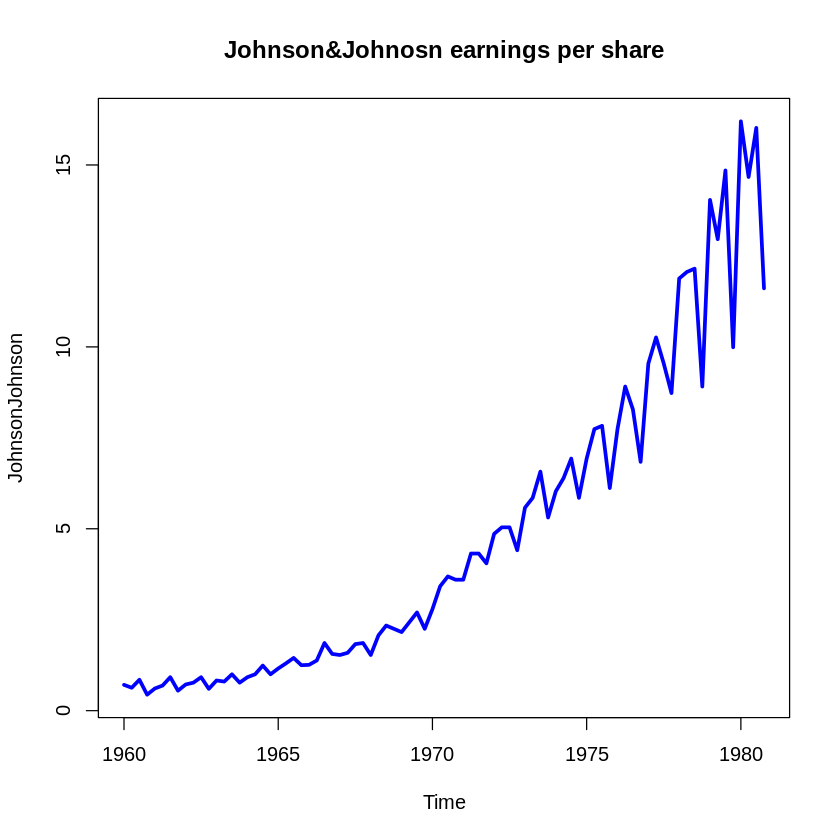

In [1]:
# Time plot for Johnson&Johnson
plot(JohnsonJohnson, main='Johnson&Johnosn earnings per share', col='blue', lwd=3)

## We can see that there is trend as it is going up
## also we can see that the variance is changing as we go ahead.
## This tells us that we have heteroschocasticity
## We also have  seasonality as every quater we can see a behaviour
## hence we need to transform it first
## We do Log transformation to stabilize the variance  and then we take difference to remove the trend

In [7]:
jj.log.return = diff(log(JohnsonJohnson))
jj.log.return.mean.zero=jj.log.return-mean(jj.log.return)

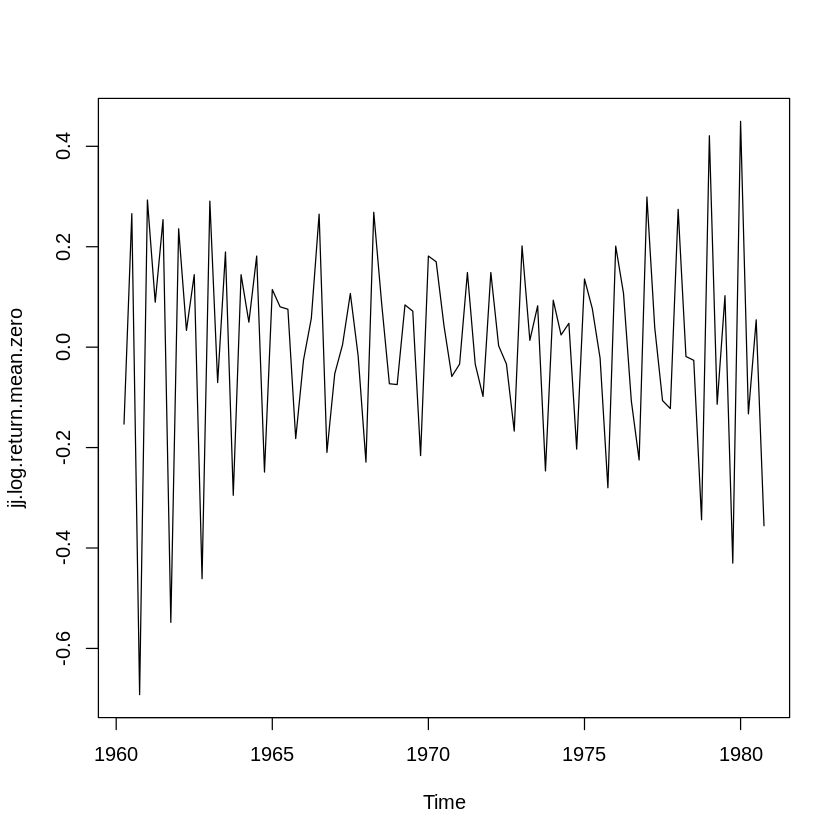

In [8]:
plot(jj.log.return.mean.zero )

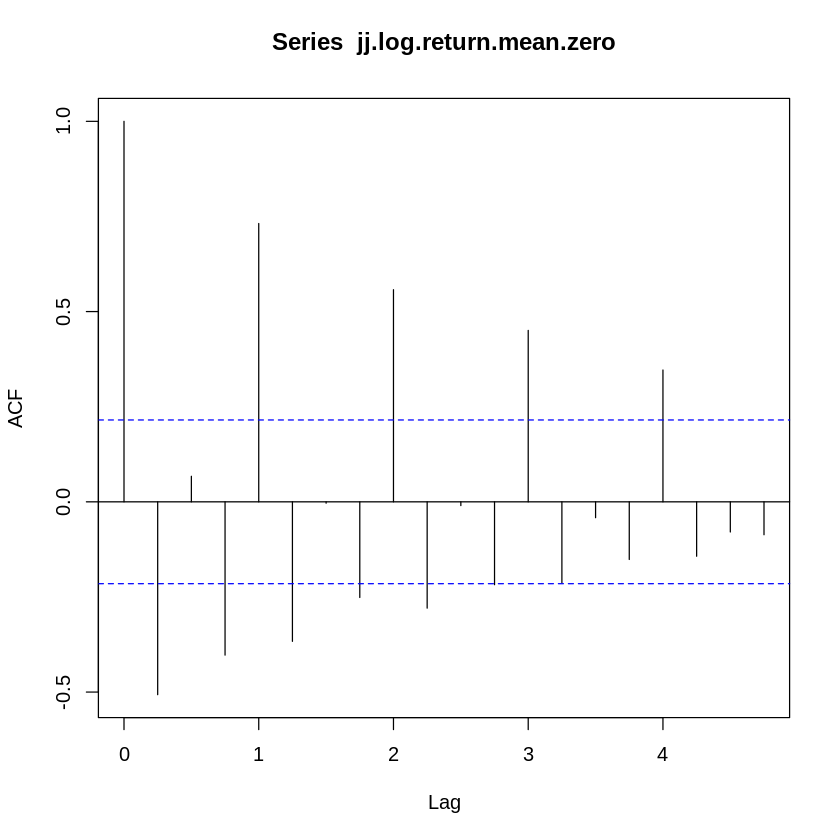

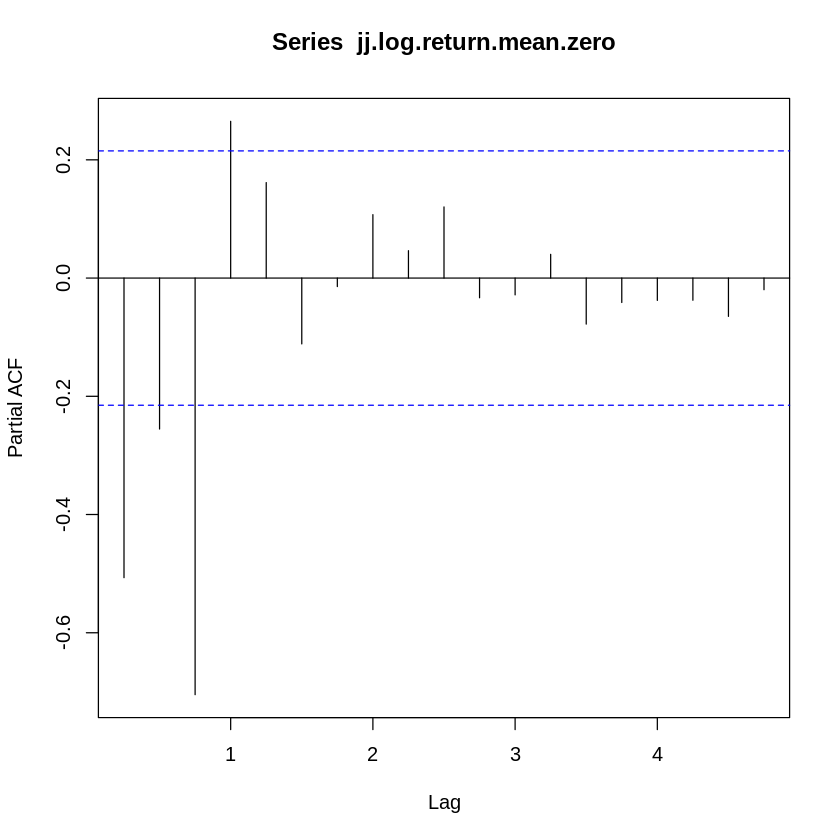

In [9]:
acf(jj.log.return.mean.zero )
pacf(jj.log.return.mean.zero )

## We have strong autocorrelation for lag 4, 8 .. that is beacause of seasonality
## Hence we take seasonal differencing

In [12]:
jj.diff.seasonal = diff(diff(log(JohnsonJohnson)),4)

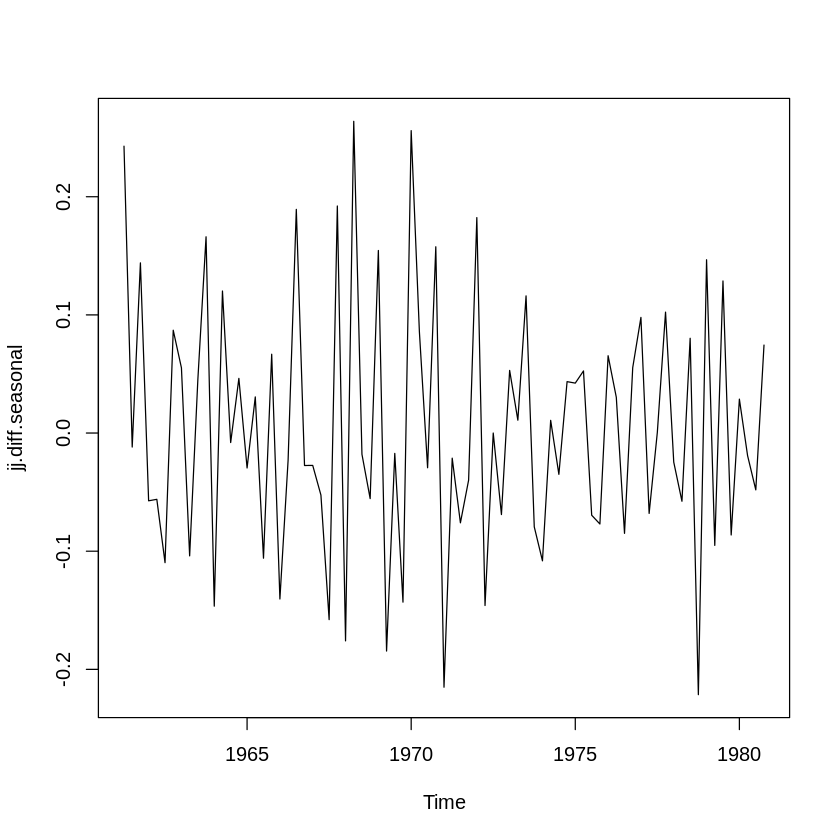

In [14]:
plot(jj.diff.seasonal)

## Now we have a stationary time series here
# Doing Ljung box test

In [15]:
Box.test(jj.diff.seasonal,log(length(jj.diff.seasonal)))


	Box-Pierce test

data:  jj.diff.seasonal
X-squared = 20.95, df = 4.3694, p-value = 0.0004658


## We can see that the p value is very small and hence we reject the null hypothesis that there is no autocorrellation between previous lags.
## Hence there is some autocorellation and we will find them using ACF and PACF

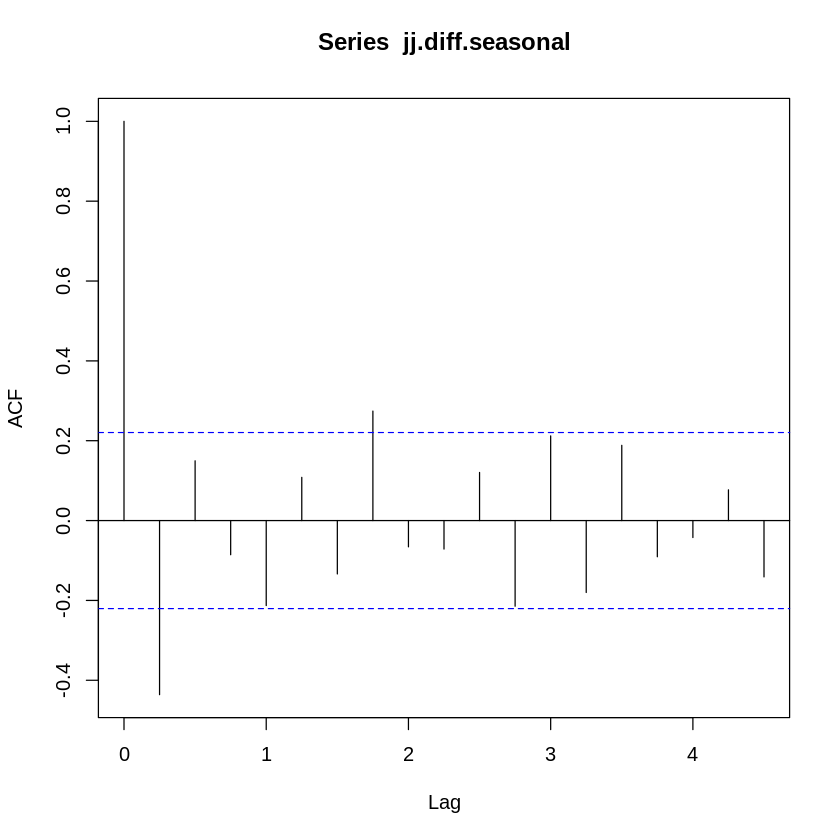

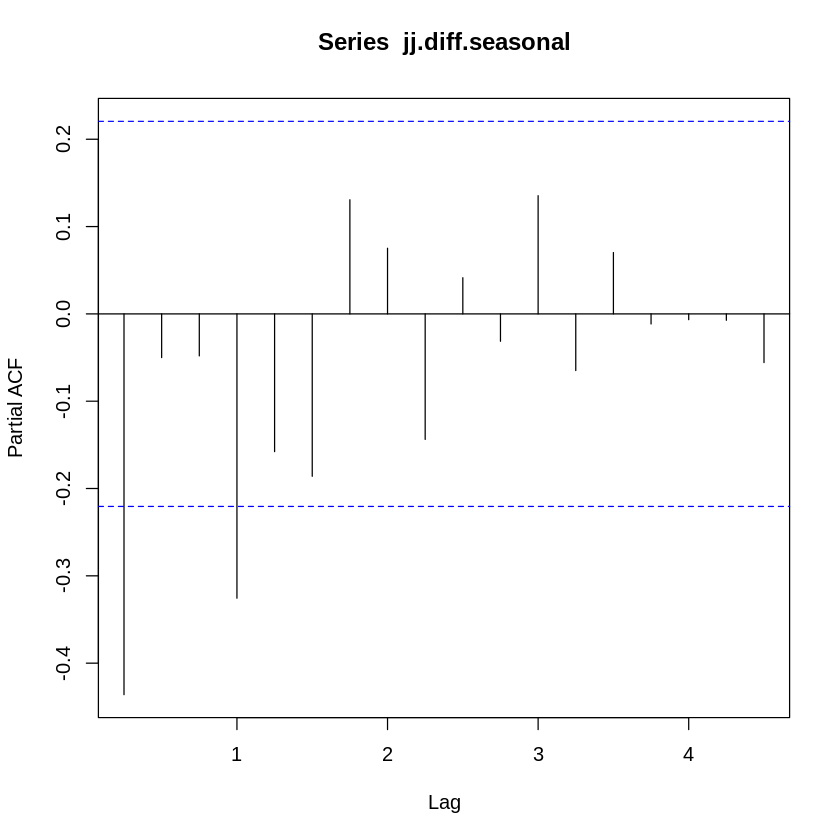

In [16]:
acf(jj.diff.seasonal )
pacf(jj.diff.seasonal )

## From acf we can see a significan autocorrelation at lag 1 and then it dies off, so we suspect its MA 1
## But also we can see that at lag 4,8.. they are almost sighnificant so we might have some seasonal correlation and it might sugges that we have order 1 seasonal moving average

## Similar for PACF, it suggests that we have AR 1 and we can see sighnificant autocorrelation at lag 4 that tells us that maybe the order of seasonal auto regressive term is 1

## our suggestions are
## ACF ---- > Q = 0,1 : Q = 0,1
## PACF --- > p = 0,1 ; q = 0,1
## So we will look at SARIMA (p,1,q,P,1,Q) (4)  models for log(jj) where 0<=p,q,P,Q<=1
## Trying different models


In [19]:
library(astsa)

d=1
DD=1

per=4

for(p in 1:2){
  for(q in 1:2){
    for(i in 1:2){
      for(j in 1:2){
        if(p+d+q+i+DD+j<=10){
          model<-arima(x=log(jj), order = c((p-1),d,(q-1)), seasonal = list(order=c((i-1),DD,(j-1)), period=per))
          pval<-Box.test(model$residuals, lag=log(length(model$residuals)))
          sse<-sum(model$residuals^2)
          cat(p-1,d,q-1,i-1,DD,j-1,per, 'AIC=', model$aic, ' SSE=',sse,' p-VALUE=', pval$p.value,'\n')
        }
      }
    }
  }
}


0 1 0 0 1 0 4 AIC= -124.0685  SSE= 0.9377871  p-VALUE= 0.0002610795 
0 1 0 0 1 1 4 AIC= -126.3493  SSE= 0.8856994  p-VALUE= 0.0001606542 
0 1 0 1 1 0 4 AIC= -125.9198  SSE= 0.8908544  p-VALUE= 0.0001978052 
0 1 0 1 1 1 4 AIC= -124.3648  SSE= 0.8854554  p-VALUE= 0.000157403 
0 1 1 0 1 0 4 AIC= -145.5139  SSE= 0.6891988  p-VALUE= 0.03543717 
0 1 1 0 1 1 4 AIC= -150.7528  SSE= 0.6265214  p-VALUE= 0.6089542 
0 1 1 1 1 0 4 AIC= -150.9134  SSE= 0.6251634  p-VALUE= 0.707918 
0 1 1 1 1 1 4 AIC= -149.1317  SSE= 0.6232876  p-VALUE= 0.6780876 
1 1 0 0 1 0 4 AIC= -139.8248  SSE= 0.7467494  p-VALUE= 0.03503386 
1 1 0 0 1 1 4 AIC= -146.0191  SSE= 0.6692691  p-VALUE= 0.5400176 
1 1 0 1 1 0 4 AIC= -146.0319  SSE= 0.6689661  p-VALUE= 0.5612964 
1 1 0 1 1 1 4 AIC= -144.3766  SSE= 0.6658382  p-VALUE= 0.5459445 
1 1 1 0 1 0 4 AIC= -145.8284  SSE= 0.667109  p-VALUE= 0.2200484 
1 1 1 0 1 1 4 AIC= -148.7706  SSE= 0.6263677  p-VALUE= 0.594822 
1 1 1 1 1 0 4 AIC= -148.9175  SSE= 0.6251104  p-VALUE= 0.719547 
1

## 0 1 1 1 1 0 4 AIC= -150.9134  SSE= 0.6251634  p-VALUE= 0.707918  this is the best model accoring to AIC, also there is no autocorrellation between the residuals as p value is high.

## making sarima model

initial  value -2.237259 
iter   2 value -2.429075
iter   3 value -2.446737
iter   4 value -2.455821
iter   5 value -2.459761
iter   6 value -2.462511
iter   7 value -2.462602
iter   8 value -2.462749
iter   9 value -2.462749
iter   9 value -2.462749
iter   9 value -2.462749
final  value -2.462749 
converged
initial  value -2.411490 
iter   2 value -2.412022
iter   3 value -2.412060
iter   4 value -2.412062
iter   4 value -2.412062
iter   4 value -2.412062
final  value -2.412062 
converged


$fit

Call:
stats::arima(x = xdata, order = c(p, d, q), seasonal = list(order = c(P, D, 
    Q), period = S), include.mean = !no.constant, optim.control = list(trace = trc, 
    REPORT = 1, reltol = tol))

Coefficients:
          ma1     sar1
      -0.6796  -0.3220
s.e.   0.0969   0.1124

sigma^2 estimated as 0.007913:  log likelihood = 78.46,  aic = -150.91

$degrees_of_freedom
[1] 77

$ttable
     Estimate     SE t.value p.value
ma1   -0.6796 0.0969 -7.0104  0.0000
sar1  -0.3220 0.1124 -2.8641  0.0054

$AIC
[1] -3.791572

$AICc
[1] -3.764191

$BIC
[1] -4.733696


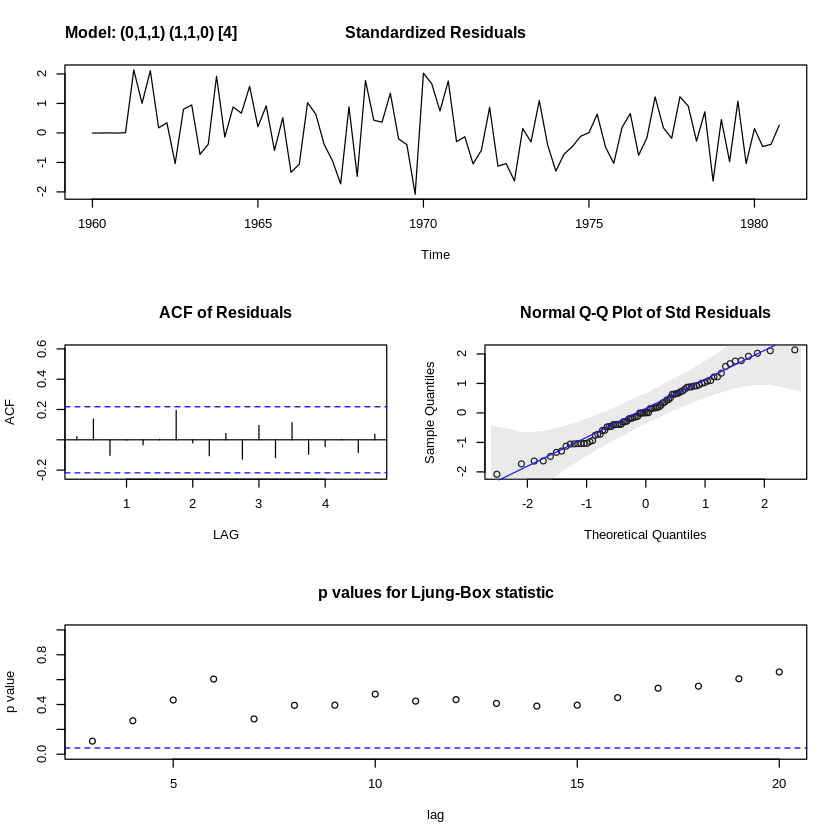

In [20]:
library(astsa)

sarima(log(JohnsonJohnson), 0,1,1,1,1,0,4)

## time plot of residuals has no evidence that is is not white noise
## Straight line in Q-Q plot saying they are normal
## no significant acf
## ljung box p values says there is no autocorrelation

## Now we will try forcasting using this model

In [22]:
model<-arima(x=log(JohnsonJohnson), order = c(0,1,1), seasonal = list(order=c(1,1,0), period=4))


Attaching package: ‘forecast’

The following object is masked from ‘package:astsa’:

    gas



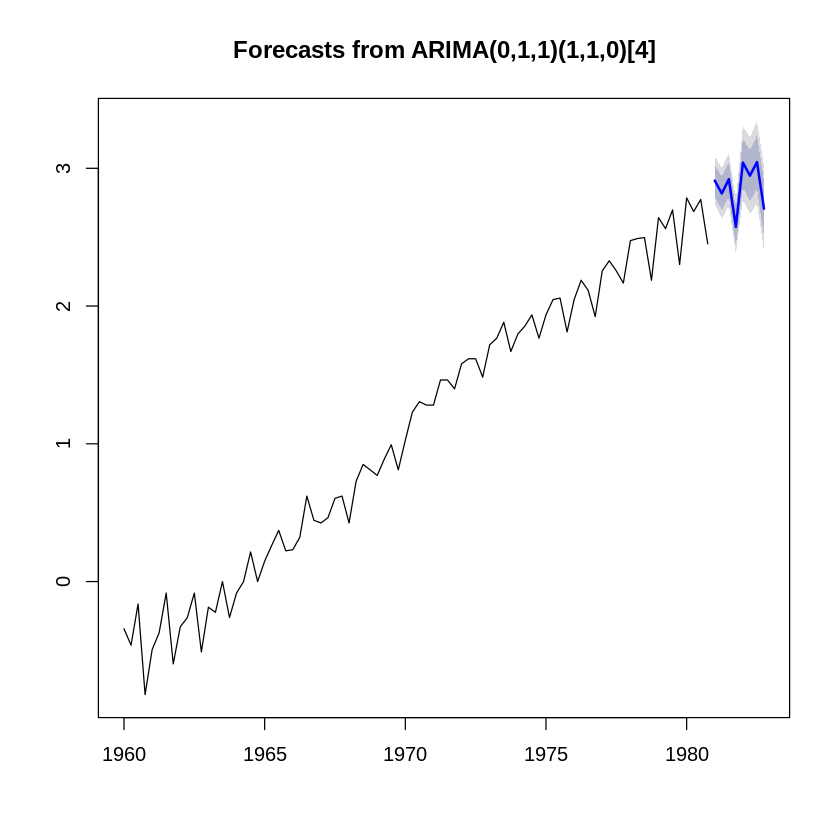

In [25]:
library(forecast)
plot(forecast(model))

In [26]:
forecast(model)

        Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
1981 Q1       2.910254 2.796250 3.024258 2.735900 3.084608
1981 Q2       2.817218 2.697507 2.936929 2.634135 3.000300
1981 Q3       2.920738 2.795580 3.045896 2.729325 3.112151
1981 Q4       2.574797 2.444419 2.705175 2.375401 2.774194
1982 Q1       3.041247 2.868176 3.214317 2.776559 3.305934
1982 Q2       2.946224 2.762623 3.129824 2.665431 3.227016
1982 Q3       3.044757 2.851198 3.238316 2.748735 3.340780
1982 Q4       2.706534 2.503505 2.909564 2.396028 3.017041